# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 3
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
data_reviews.isna().sum()

username              0
hours              8771
products           4930
product_id            0
page_order            0
date                  0
text                  0
early_access          0
page                  0
found_funny     2196982
user_id         1539195
compensation    2548852
dtype: int64

In [5]:
len(data_reviews)

2597690

In [6]:
len(data_reviews['product_id'].unique())

14554

In [7]:
data_reviews.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,user_id,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN
2,nd,1.0,2759.0,725280,2,2017-11-28,"endless rooms of some underground complex, blo...",False,1,1.0,NaN,NaN
3,Otomji,1.1,399.0,707610,1,2017-09-17,This bought back fond memories of playing Mahj...,False,1,NaN,NaN,NaN
4,Phr0stY_D3mon,2.2,1195.0,328100,4,2017-05-30,Gunspell is an alternate take on the classic m...,False,1,NaN,NaN,NaN


In [8]:
ds=data_reviews.copy()

In [9]:
ds.drop(['date', 'products','page_order','text','early_access','compensation','found_funny'], axis=1, inplace=True)

In [10]:
ds.describe()

,hours,page
count,2.588919e+06,2.597690e+06
mean,1.122417e+02,8.929648e+02
std,3.971601e+02,1.927777e+03
min,0.000000e+00,1.000000e+00
25%,4.000000e+00,5.200000e+01
50%,1.540000e+01,2.370000e+02
75%,5.970000e+01,8.290000e+02
max,4.210070e+04,1.837100e+04


In [11]:
ds

,username,hours,product_id,page,user_id
0,Chaos Syren,0.1,725280,1,NaN
1,Cyderine916,5.0,35140,1,NaN
2,nd,1.0,725280,1,NaN
3,Otomji,1.1,707610,1,NaN
4,Phr0stY_D3mon,2.2,328100,1,NaN
...,...,...,...,...,...
2597685,Zezztah,591.3,252490,10220,NaN
2597686,Evorix,2775.2,252490,10220,76561197962161824
2597687,worldoftanks,82.2,252490,10221,76561198010660367
2597688,Wildman_,174.3,252490,10221,NaN


In [12]:
len(ds['username'].unique())

1315964

In [13]:
import pandas as pd
import seaborn as sns

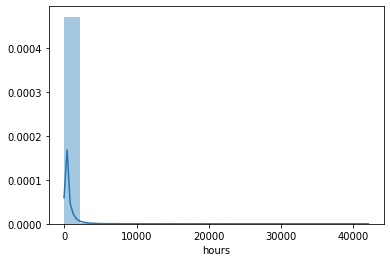

In [14]:
sns.distplot(ds['hours'], bins = 20, label = 'train')

In [15]:
import numpy as np
usuarios=ds['username'].unique()
 

usr_unico=pd.DataFrame(usuarios,columns=['username'])   

print(len(usr_unico))

user_id=np.array(range(1,1315965,1))
len(user_id)

usr_unico['user_id']=user_id
usr_unico
 


 

1315964


,username,user_id
0,Chaos Syren,1
1,Cyderine916,2
2,nd,3
3,Otomji,4
4,Phr0stY_D3mon,5
...,...,...
1315959,Crit_Magnet_,1315960
1315960,vinao bala tronxa,1315961
1315961,Evorix,1315962
1315962,worldoftanks,1315963


In [16]:
merge=ds.merge(usr_unico, left_on='username', right_on='username')

In [17]:
merge

,username,hours,product_id,page,user_id_x,user_id_y
0,Chaos Syren,0.1,725280,1,NaN,1
1,Cyderine916,5.0,35140,1,NaN,2
2,Cyderine916,180.5,377160,4,NaN,2
3,nd,1.0,725280,1,NaN,3
4,nd,2.9,654350,1,NaN,3
...,...,...,...,...,...,...
2597685,Crit_Magnet_,16.0,252490,10220,NaN,1315960
2597686,vinao bala tronxa,345.2,252490,10220,NaN,1315961
2597687,Evorix,2775.2,252490,10220,76561197962161824,1315962
2597688,worldoftanks,82.2,252490,10221,76561198010660367,1315963


In [18]:
merge.rename(columns = {'user_id_y':'user_id'}, inplace = True) 

In [19]:
merge.drop(columns=['user_id_x'], inplace=True)


In [20]:
merge.drop(columns=['page','username'], inplace=True)
merge
 

,hours,product_id,user_id
0,0.1,725280,1
1,5.0,35140,2
2,180.5,377160,2
3,1.0,725280,3
4,2.9,654350,3
...,...,...,...
2597685,16.0,252490,1315960
2597686,345.2,252490,1315961
2597687,2775.2,252490,1315962
2597688,82.2,252490,1315963


In [21]:
merge['rank']=0
merge

,hours,product_id,user_id,rank
0,0.1,725280,1,0
1,5.0,35140,2,0
2,180.5,377160,2,0
3,1.0,725280,3,0
4,2.9,654350,3,0
...,...,...,...,...
2597685,16.0,252490,1315960,0
2597686,345.2,252490,1315961,0
2597687,2775.2,252490,1315962,0
2597688,82.2,252490,1315963,0


In [22]:
rank=[10,20,30,40,50,60,70,80,90]

for valor in rank:
    merge['rank'][(merge.hours>(valor-10)) & (merge.hours<=valor)]=(valor/10)

merge['rank'][(merge.hours>=100) ]=10
merge

<ipython-input-22-1b4409742bcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['rank'][(merge.hours>(valor-10)) & (merge.hours<=valor)]=(valor/10)
<ipython-input-22-1b4409742bcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['rank'][(merge.hours>(valor-10)) & (merge.hours<=valor)]=(valor/10)


,hours,product_id,user_id,rank
0,0.1,725280,1,1
1,5.0,35140,2,1
2,180.5,377160,2,10
3,1.0,725280,3,1
4,2.9,654350,3,1
...,...,...,...,...
2597685,16.0,252490,1315960,2
2597686,345.2,252490,1315961,10
2597687,2775.2,252490,1315962,10
2597688,82.2,252490,1315963,9


In [23]:
merge.drop(columns=['hours'], inplace=True)


In [24]:
merge

,product_id,user_id,rank
0,725280,1,1
1,35140,2,1
2,377160,2,10
3,725280,3,1
4,654350,3,1
...,...,...,...
2597685,252490,1315960,2
2597686,252490,1315961,10
2597687,252490,1315962,10
2597688,252490,1315963,9


In [25]:
merge['user']=merge['user_id']
merge['rating']=merge['rank']
merge['id']=merge['product_id']
merge.drop(columns=['product_id','user_id','rank'], inplace=True)
merge

,user,rating,id
0,1,1,725280
1,2,1,35140
2,2,10,377160
3,3,1,725280
4,3,1,654350
...,...,...,...
2597685,1315960,2,252490
2597686,1315961,10,252490
2597687,1315962,10,252490
2597688,1315963,9,252490


In [ ]:
## Analisis Exploratorio de Datos

In [28]:
cuenta=merge.set_index(["user", "rating"]).count(level="user").sort_values(by=['id'],ascending=False)
cuenta

,id
user,
16480,668
1484,568
14900,481
8378,470
235,439
...,...
609999,1
610000,1
610001,1


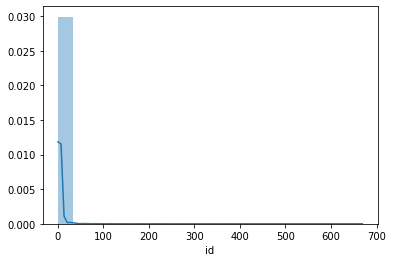

In [29]:
 sns.distplot(cuenta['id'], bins = 20, label = 'train')

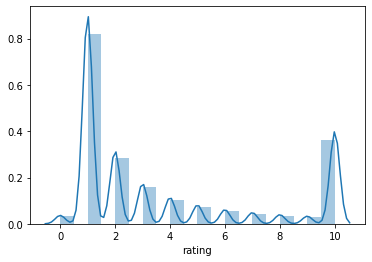

In [30]:
sns.distplot(merge['rating'], bins = 20, label = 'train')

 
## Analisis con Surprice
 

In [31]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

In [32]:
reader = Reader(rating_scale=(0, 10)) # Esta libreria se usa para parsear un archivo de rating que debe tener la forma de user ; item ; rating ; [timestamp] https://surprise.readthedocs.io/en/stable/reader.html

In [33]:
N_filas =500000 # Limitamos el dataset a N_filas

data = Dataset.load_from_df(merge[['user', 'id', 'rating']][:N_filas], reader)

In [34]:
data

In [35]:
trainset, testset = train_test_split(data, test_size=.25)

In [36]:
from surprise import SVD
algo = SVD(n_factors =50,n_epochs=50) #Ver de subir el hipermarametro

In [37]:
algo.fit(trainset)

In [38]:
predictions = algo.test(testset)

In [39]:
predictions[1]

Prediction(uid=1773, iid='4000', r_ui=10.0, est=9.890703970271131, details={'was_impossible': False})

In [40]:
algo.predict(3,252490)

Prediction(uid=3, iid=252490, r_ui=None, est=1.9038964483508902, details={'was_impossible': False})

In [41]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [42]:
df_games=data_games[['id','title']]
df_games

,id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN
...,...,...
32130,773640,Colony On Mars
32131,733530,LOGistICAL: South Africa
32132,610660,Russian Roads
32133,658870,EXIT 2 - Directions


In [43]:
usuario = 3
rating = 1   # le pedimos peliculas a las que haya puesto 4 o 5 estrellas
df_user = merge[(merge['user'] == usuario) & (merge['rating'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user = pd.merge(left=df_user,right=df_games, left_on='id', right_on='id')
df_user

,user,rating,id,title
0,3,1,725280,Psi Project
1,3,1,654350,Cyber Utopia
2,3,1,595480,Hunahpu: way of the Warrior
3,3,1,422650,Megamagic: Wizards of the Neon Age
4,3,1,384150,TeraBlaster
...,...,...,...,...
86,3,1,654710,Ashes
87,3,1,603860,Hexagon Defense
88,3,1,550840,Fresh Body
89,3,1,682070,MIND SHIFT 🔲


In [44]:
recomendaciones_usuario = df_games.iloc[:4499].copy()
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 2)


,id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


In [45]:
usuario_vistas = merge[merge['user'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(92, 3)


,user,rating,id
3,3,1,725280
4,3,1,654350
5,3,1,595480
6,3,1,422650
7,3,1,384150


In [46]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['id'].apply(lambda x: algo.predict(usuario, x).est)

In [47]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
print(recomendaciones_usuario.head(10))

          id                                              title  \
2800  299740                                         Miscreated   
855   203770                                  Crusader Kings II   
969   212500                      The Lord of the Rings Online™   
1045     730                   Counter-Strike: Global Offensive   
58      4000                                        Garry's Mod   
728    35450  Red Orchestra 2: Heroes of Stalingrad with Ris...   
2869  329110                           Gems of War - Puzzle RPG   
1819  259680                                  Tales of Maj'Eyal   
1213  212200                                           Mabinogi   
1947  247000                          Talisman: Digital Edition   

      Estimate_Score  
2800        9.984579  
855         8.078699  
969         7.757924  
1045        7.373876  
58          6.980830  
728         6.777263  
2869        6.473133  
1819        6.326062  
1213        6.319585  
1947        6.209124  


In [48]:
from surprise import accuracy 
accuracy.rmse(predictions, verbose=True)

RMSE: 2.6017


2.60174240506975